# Image Cleaning

Here I'll be writing the code to tidy the image data, and also creating a database of the images that we managed to download.

In [1]:
import os, re
import hashlib
from urllib.parse import urlparse
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
% matplotlib inline

In [2]:
images_path = "../images/full/"
image_data = pd.read_csv("../data/search_results.csv")

In [3]:
len(image_data)

30077

In [4]:
image_data.head()

,index,country,topic,query_name,query,link
0,14,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak5.picdn.net/shutterstock/videos/2673...
1,24,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak6.picdn.net/shutterstock/videos/1050...
2,26,Brazil,boy child face,Brazil boy,Brazil boy child face,http://footage.framepool.com/shotimg/qf/558783...
3,8,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak2.picdn.net/shutterstock/videos/7691...
4,33,Brazil,boy child face,Brazil boy,Brazil boy child face,https://thumb1.shutterstock.com/display_pic_wi...


In [5]:
def hash_link(link):
    sha1 = hashlib.sha1()
    sha1.update(link.encode("utf-8"))
    return sha1.hexdigest()

image_data['hash'] = image_data.link.apply(hash_link)

In [6]:
image_data.head()

,index,country,topic,query_name,query,link,hash
0,14,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak5.picdn.net/shutterstock/videos/2673...,23a22628941d119d778fea07368859411bfe77c9
1,24,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak6.picdn.net/shutterstock/videos/1050...,77fa12c9ecc3b65e5a442fa71ba83d54d6d63c64
2,26,Brazil,boy child face,Brazil boy,Brazil boy child face,http://footage.framepool.com/shotimg/qf/558783...,185d405404f2f8df593a58f215dc55d4615a2187
3,8,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak2.picdn.net/shutterstock/videos/7691...,5bb92e7dd808f4703f7557a4b20f33463caf4820
4,33,Brazil,boy child face,Brazil boy,Brazil boy child face,https://thumb1.shutterstock.com/display_pic_wi...,44ed7be3483412cfd515f0990797ab9502c97b89


In [7]:
image_data['downloaded'] = (
    image_data.hash
        .apply(lambda hash_val: 
            os.path.exists(
            os.path.join(images_path, hash_val + ".jpg"))))

In [8]:
(image_data
    .sort_values('index')
    .groupby('query_name')
    .head()
    .sort_values(['country', 'query_name', 'index'])
    [~image_data.downloaded]
    .head())

C:\Users\caleb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,index,country,topic,query_name,query,link,hash,downloaded
26214,4,Afghanistan,animals,Afghanistan animals,Afghanistan animals,https://5b-afghanistan.wikispaces.com/file/vie...,6254c1342e939116560247e66f29c4f448a5498e,False
25506,1,Afghanistan,boy,Afghanistan boy,Afghanistan boy child face,https://s-media-cache-ak0.pinimg.com/originals...,7947696d2cbc260f5ca9f7fb5dc3e13f345a606c,False
25513,2,Afghanistan,boy,Afghanistan boy,Afghanistan boy child face,https://i.pinimg.com/736x/27/c3/1b/27c31bde8f7...,f6b5697284f06e079097552a3fb7a102fa7644ea,False
25525,3,Afghanistan,boy,Afghanistan boy,Afghanistan boy child face,https://i.pinimg.com/736x/b9/22/92/b92292fad97...,1bea2d7239a83cdffe2ac9df40cd33b31ad8c7b3,False
25517,4,Afghanistan,boy,Afghanistan boy,Afghanistan boy child face,https://i.pinimg.com/736x/93/67/35/9367358597c...,e54a570e0b5ab0150959e6a1ca6c51e58a803474,False


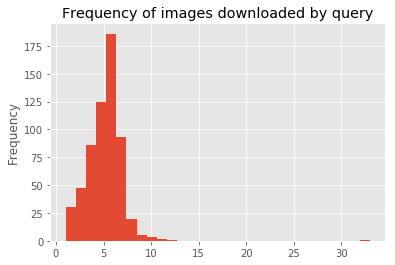

In [9]:
(image_data.where(image_data.downloaded)
    .groupby('query_name')
    .count()
    .loc[:,'downloaded']
    .sort_values()
    .plot(kind = 'hist', bins = 30,
          title = 'Frequency of images downloaded by query'))

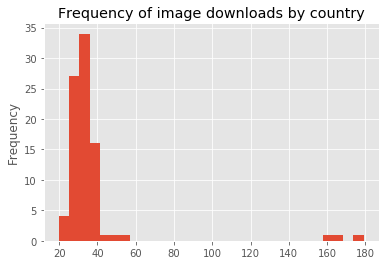

In [10]:
(image_data.where(image_data.downloaded)
    .groupby('country')
    .count()
    .loc[:, 'downloaded']
    .plot(kind='hist', bins=30, title='Frequency of image downloads by country'))

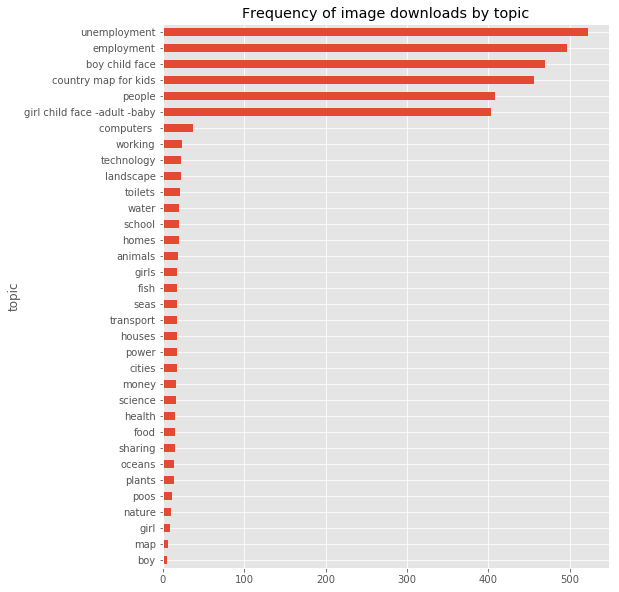

In [11]:
(image_data.where(image_data.downloaded)
    .groupby('topic')
    .count()
    .loc[:, 'downloaded']
    .sort_values()
    .plot(kind='barh', figsize=(8,10), 
          title='Frequency of image downloads by topic'))

In [12]:
len(image_data.where(image_data.downloaded))

30077

In [13]:
image_data.head()

,index,country,topic,query_name,query,link,hash,downloaded
0,14,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak5.picdn.net/shutterstock/videos/2673...,23a22628941d119d778fea07368859411bfe77c9,True
1,24,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak6.picdn.net/shutterstock/videos/1050...,77fa12c9ecc3b65e5a442fa71ba83d54d6d63c64,True
2,26,Brazil,boy child face,Brazil boy,Brazil boy child face,http://footage.framepool.com/shotimg/qf/558783...,185d405404f2f8df593a58f215dc55d4615a2187,True
3,8,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak2.picdn.net/shutterstock/videos/7691...,5bb92e7dd808f4703f7557a4b20f33463caf4820,True
4,33,Brazil,boy child face,Brazil boy,Brazil boy child face,https://thumb1.shutterstock.com/display_pic_wi...,44ed7be3483412cfd515f0990797ab9502c97b89,True


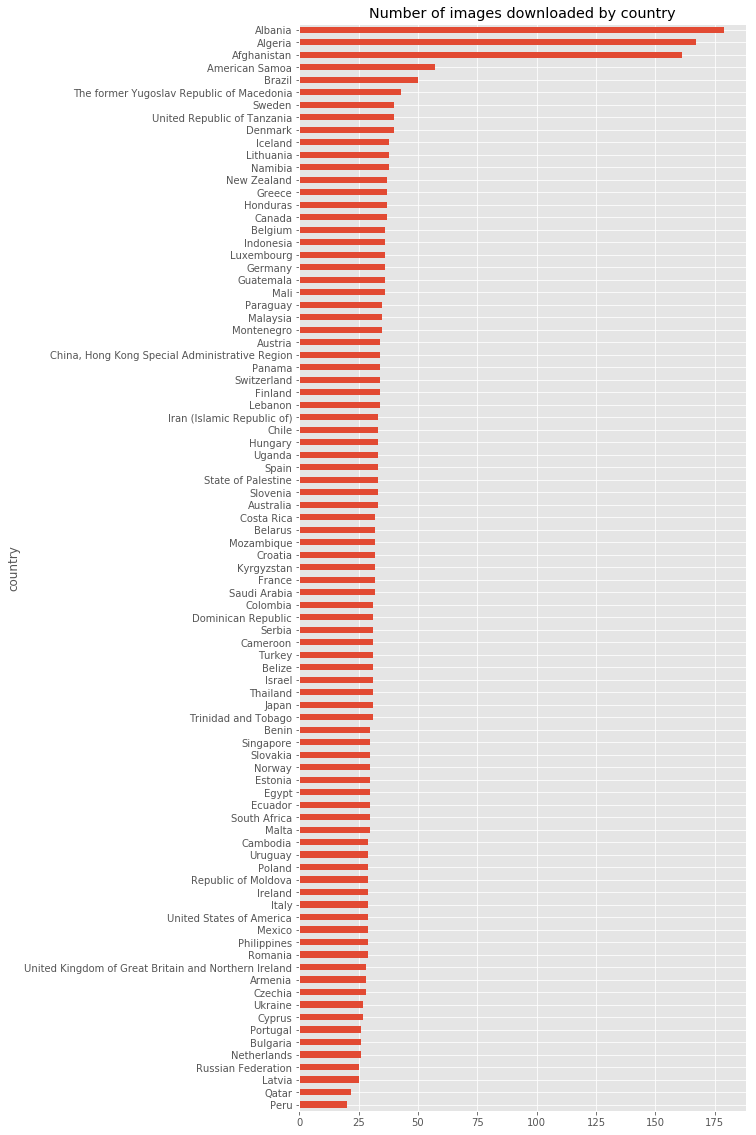

In [14]:
(image_data.where(image_data.downloaded)
    .groupby('country')
    .count()
    .loc[:,'downloaded']
    .sort_values()
    .plot(kind='barh', figsize = (8, 20),
          title='Number of images downloaded by country'))

In [15]:
def tidy_domain(link):
    domain = urlparse(link).hostname
    pattern = ['', 'co', 'ac', 'org', 'com', 'gov']
    pattern = "|".join(["[^\\.]+\\.%s\\.?[A-z]*$" % p for p in pattern])
    if domain is not None:
        search_result = re.search(pattern, domain)
        if search_result is not None:
            return search_result.group(0)

image_data['domain'] = image_data.link.apply(tidy_domain)

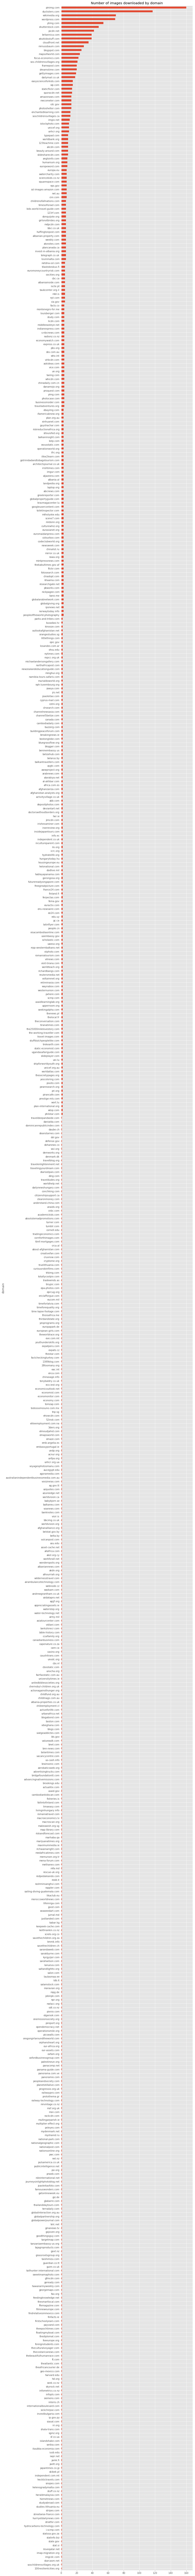

In [103]:
(image_data.where(image_data.downloaded)
    .groupby('domain')
    .count()
    .loc[:,'downloaded']
    .sort_values()
    .plot(kind='barh', figsize = (10, 200),
          title='Number of images downloaded by domain'))

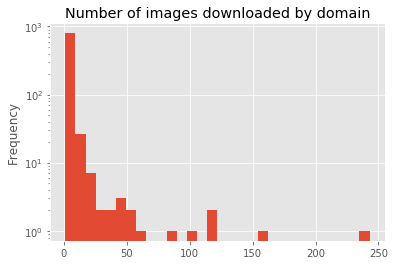

In [16]:
(image_data.where(image_data.downloaded)
    .groupby('domain')
    .count()
    .loc[:,'downloaded']
    .sort_values()
    .plot(kind='hist', bins = 30, logy = True,
          title='Number of images downloaded by domain'))

In [17]:
print(", ".join(sorted(image_data.where(image_data.downloaded)
    .groupby('domain')
    .count()
    .loc[:,'downloaded']
    .sort_values()
    .index)))

100resilientcities.org, 123rf.com, 123teachme.com, 1389blog.com, 24.co.za, 28toomany.org, 3ders.org, 52insk.com, abb.com, abcnews.com, about-afghanistan.com, absolutemadpromotions.com, academickids.com, acnnewswire.com, acnur.org, acted.org, actionagainsthunger.org, activeforlife.com, activityvillage.co.uk, actualitix.com, adbells.com, advancingnativemissions.com, advertisingtrucks.com, aerobaticsweb.org, afghanalliance.org, afghanistan-analysts.org, afghanzariza.com, africa.com.es, ag.gov.tt, agoramedia.com, ahram.org.eg, aic.lv, aiidatapro.net, airambulancetechnology.com, akdn.org, akel.org.cy, al-akhbar.com, al-monitor.com, alamy.com, alarabiya.net, albania-properties.co.uk, albania.al, albaniainside.com, albanian-property.com, albaniannews.com, alhourriah.org, alicdn.com, aljazeera.com, allafrica.com, amazonaws.com, ambergriscaye.com, ambergristoday.com, andrewgrantham.co.uk, angloinfo.com, anopenbox.com, apipnm.org, apjjf.org, appreciatingassets.ie, arabnews.com, architectsjournal

## Copying files to new folders

In [18]:
import shutil

In [19]:
image_data.where(image_data.downloaded)

,index,country,topic,query_name,query,link,hash,downloaded,domain
0,14.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak5.picdn.net/shutterstock/videos/2673...,23a22628941d119d778fea07368859411bfe77c9,1.0,picdn.net
1,24.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak6.picdn.net/shutterstock/videos/1050...,77fa12c9ecc3b65e5a442fa71ba83d54d6d63c64,1.0,picdn.net
2,26.0,Brazil,boy child face,Brazil boy,Brazil boy child face,http://footage.framepool.com/shotimg/qf/558783...,185d405404f2f8df593a58f215dc55d4615a2187,1.0,framepool.com
3,8.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak2.picdn.net/shutterstock/videos/7691...,5bb92e7dd808f4703f7557a4b20f33463caf4820,1.0,picdn.net
4,33.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://thumb1.shutterstock.com/display_pic_wi...,44ed7be3483412cfd515f0990797ab9502c97b89,1.0,shutterstock.com
5,38.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak5.picdn.net/shutterstock/videos/2202...,3202cc76132dc7eaca9b3af7ab814f25955c087a,1.0,picdn.net
6,41.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak8.picdn.net/shutterstock/videos/7691...,6ba043b5026eca096e5f638bfc7ef501ef1ae659,1.0,picdn.net
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak2.picdn.net/shutterstock/videos/7679...,f13607cc1cb36af1aee6e8deb2e107752ab212ce,1.0,picdn.net
9,27.0,Brazil,boy child face,Brazil boy,Brazil boy child face,https://ak9.picdn.net/shutterstock/videos/6052...,34fb081bc9c6fd1cb62cbbd59487b12cf03a7865,1.0,picdn.net


# Removing old unemployment images

In [20]:
os.getcwd()

'D:\\Users\\cmoses\\Documents\\Work\\SDG-Global-Village\\notebooks'

In [21]:
employment_images = sorted(
    set(os.listdir("../images/unemployment") + 
        os.listdir("../images/employment")))
employment_hashes = list(map(lambda x: x.split(".", 1)[0], employment_images))

In [40]:
image_data.loc[
      (image_data.hash.isin(employment_hashes)) 
    & (image_data.downloaded), :]

In [42]:
def delete_images(x):
    '''Deletes an image file in the images_path, and returns False'''
    filepath = images_path + x.hash + '.jpg'
    if os.path.exists(filepath):
        os.remove(filepath)
        return False
    else:
        return True

mask = image_data.hash.isin(employment_hashes) & image_data.downloaded
image_data.loc[mask, 'downloaded'] = (image_data[mask]
    .apply(delete_images, axis = 1)
    )

In [51]:
image_data['filename'] = image_data.hash + ".jpg"

In [61]:
def copy_image(f):
    '''Copies an image from the full directory to its topic folder'''
    file_name   = images_path + f.filename
    target_path = "../images/" + f.topic + "/"
    target_name =  target_path + f.filename
    
    if not os.path.exists(target_path):
        os.mkdir(target_path)
    if not os.path.exists(file_name):
        return file_name
    
    # copy the file
    shutil.copy2(file_name, target_name)
    return target_name
    
# image_data['filepath'] = (image_data
#     .loc[image_data.downloaded, :]
#     .apply(copy_image, axis = 1)
# )

In [70]:
# image_data.to_csv("../data/search_results.csv", index=None)

In [75]:
image_data[(image_data.country == "New Zealand") & image_data.downloaded]

,index,country,topic,query_name,query,link,hash,downloaded,domain,filename,filepath
23408,9,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,http://www.abc.net.au/news/image/7143812-3x2-7...,1fc958cc0b8c94b991bc5e4550f5201f11500ef8,True,net.au,1fc958cc0b8c94b991bc5e4550f5201f11500ef8.jpg,../images/boy child face/1fc958cc0b8c94b991bc5...
23414,1,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,http://i.dailymail.co.uk/i/pix/2016/05/14/08/3...,9c2a54c002e4e5270a6808ce0585538b2c3da8db,True,dailymail.co.uk,9c2a54c002e4e5270a6808ce0585538b2c3da8db.jpg,../images/boy child face/9c2a54c002e4e5270a680...
23415,4,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,http://i1.mirror.co.uk/incoming/article1033439...,9aff0c82b631a6c075142f1906de4d479ff00670,True,mirror.co.uk,9aff0c82b631a6c075142f1906de4d479ff00670.jpg,../images/boy child face/9aff0c82b631a6c075142...
23416,2,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,https://www.mrvintage.co.nz/media/wysiwyg/new-...,f289c9e9d95b6e536ee7cb382ca3ea4306abe403,True,mrvintage.co.nz,f289c9e9d95b6e536ee7cb382ca3ea4306abe403.jpg,../images/boy child face/f289c9e9d95b6e536ee7c...
23427,50,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,http://i.dailymail.co.uk/i/pix/2016/05/14/08/3...,9c2a54c002e4e5270a6808ce0585538b2c3da8db,True,dailymail.co.uk,9c2a54c002e4e5270a6808ce0585538b2c3da8db.jpg,../images/boy child face/9c2a54c002e4e5270a680...
23439,3,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,https://i.pinimg.com/736x/cd/8b/ca/cd8bcadcdb0...,947b03e9fa9876a01c35d8eee5ef12da8801cad3,True,pinimg.com,947b03e9fa9876a01c35d8eee5ef12da8801cad3.jpg,../images/boy child face/947b03e9fa9876a01c35d...
23441,5,New Zealand,boy child face,New Zealand boy,New Zealand boy child face,https://resources.stuff.co.nz/content/dam/imag...,810ef6407feb90b4a13de097ea57176ca46d1d3a,True,stuff.co.nz,810ef6407feb90b4a13de097ea57176ca46d1d3a.jpg,../images/boy child face/810ef6407feb90b4a13de...
23453,3,New Zealand,girl child face -adult -baby,New Zealand girl,New Zealand girl child face -adult -baby,https://i.pinimg.com/736x/f1/9d/be/f19dbeabbf9...,e5987070b7772361aa576e8b7474d7f35fa2f2d4,True,pinimg.com,e5987070b7772361aa576e8b7474d7f35fa2f2d4.jpg,../images/girl child face -adult -baby/e598707...
23457,5,New Zealand,girl child face -adult -baby,New Zealand girl,New Zealand girl child face -adult -baby,https://static1.squarespace.com/static/5813fb6...,83679702c479980039daabb3c92490815e5d3714,True,squarespace.com,83679702c479980039daabb3c92490815e5d3714.jpg,../images/girl child face -adult -baby/8367970...
23460,8,New Zealand,girl child face -adult -baby,New Zealand girl,New Zealand girl child face -adult -baby,http://www.radionz.co.nz/assets/news/104295/fo...,7a4d8e181c7c011c2d10b91f397da35d05b878dd,True,radionz.co.nz,7a4d8e181c7c011c2d10b91f397da35d05b878dd.jpg,../images/girl child face -adult -baby/7a4d8e1...


In [96]:
# image_data = pd.read_csv("../data/search_results.csv")

In [97]:
def delete_images(x):
    '''deletes an image from the filepath'''
    filepath = x.filepath
    if os.path.exists(filepath):
        os.remove(filepath)
    return False

mask = (image_data.domain == "alamy.com") & ~image_data.filepath.isnull()
# image_data.loc[mask, 'downloaded'] = (image_data.loc[mask]
#     .apply(delete_images, axis = 1)
# )

In [99]:
# image_data.to_csv("../data/search_results.csv", index=None)

In [101]:
image_data.loc[image_data.domain == "alamy.com"]

,index,country,topic,query_name,query,link,hash,downloaded,domain,filename,filepath
12,47,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l450v.alamy.com/450v/a540cj/painet-ha23...,cc1fd28607db0c5c053b4105ff58bc43167e85d4,False,alamy.com,cc1fd28607db0c5c053b4105ff58bc43167e85d4.jpg,../images/boy child face/cc1fd28607db0c5c053b4...
14,6,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l7.alamy.com/zooms/ec716b1e1059452bbe89...,158ac6fafc3937f9ebd68536964d73a6802e5424,False,alamy.com,158ac6fafc3937f9ebd68536964d73a6802e5424.jpg,../images/boy child face/158ac6fafc3937f9ebd68...
16,11,Brazil,boy child face,Brazil boy,Brazil boy child face,http://c8.alamy.com/comp/A5697M/painet-iy8038-...,50826a1444f98a7308fc7b02b316642aa8dba2f4,False,alamy.com,50826a1444f98a7308fc7b02b316642aa8dba2f4.jpg,NaN
17,22,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l7.alamy.com/zooms/bd234cfd3a814111a405...,231873b14dcc9666942eadf40929dad8ad4eddd3,False,alamy.com,231873b14dcc9666942eadf40929dad8ad4eddd3.jpg,NaN
21,46,Brazil,boy child face,Brazil boy,Brazil boy child face,http://c8.alamy.com/comp/BHAXXB/portrait-of-sm...,8c615b0957defee909b1975d95201aef5bae84a9,False,alamy.com,8c615b0957defee909b1975d95201aef5bae84a9.jpg,NaN
32,12,Brazil,boy child face,Brazil boy,Brazil boy child face,http://c8.alamy.com/comp/C86AT0/a-ukre-village...,236dd81e8ae8e98350fa880ee7ab666c24a12cdb,False,alamy.com,236dd81e8ae8e98350fa880ee7ab666c24a12cdb.jpg,NaN
41,36,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l450v.alamy.com/450v/a5407t/painet-ha23...,6565cdc5d320dd9cdd168121e0e30304571c883b,False,alamy.com,6565cdc5d320dd9cdd168121e0e30304571c883b.jpg,../images/boy child face/6565cdc5d320dd9cdd168...
44,21,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l7.alamy.com/zooms/0f7490209c414f66b6f3...,85ba7958a0e5febb877444435ee23aab801b3b4d,False,alamy.com,85ba7958a0e5febb877444435ee23aab801b3b4d.jpg,NaN
45,23,Brazil,boy child face,Brazil boy,Brazil boy child face,http://l7.alamy.com/zooms/058fd6fcc69c41f0bcf9...,82acf8b6a9e39946946ffdfd04a8970efed87352,False,alamy.com,82acf8b6a9e39946946ffdfd04a8970efed87352.jpg,NaN
54,7,Brazil,girl child face -adult -baby,Brazil girl,Brazil girl child face -adult -baby,http://c8.alamy.com/comp/A569GH/painet-iy8083-...,48b212e7b530258e7472c29f66cea7f0bf3d3262,False,alamy.com,48b212e7b530258e7472c29f66cea7f0bf3d3262.jpg,NaN
